In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import ssl
import os

In [13]:
# ✅ Fix SSL certificate verification issue
ssl._create_default_https_context = ssl._create_unverified_context

In [14]:
# ✅ Updated data path (no train/val/test directories; direct class folders under 'Body Parts')
data_dir = 'Body Parts/Lips'  # Example: 'Body Parts/Eye', 'Body Parts/Face', etc.


In [15]:
# Image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [16]:
# ✅ Data augmentation and data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # ✅ Split data into 80% train and 20% validation
)


In [17]:
# ✅ Generator function
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 48 images belonging to 3 classes.
Found 11 images belonging to 3 classes.


In [18]:
# ✅ Debugging: Verify classes
print("Classes found:", train_generator.class_indices)
num_classes = train_generator.num_classes
print(f"Number of classes detected: {num_classes}")

Classes found: {'Angular cheilitis': 0, 'Cracked': 1, 'Normal ': 2}
Number of classes detected: 3


In [19]:
# ✅ Build VGG16 model
def build_vgg16_model(num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [20]:
# ✅ Callbacks to save the model
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(filepath=f'{model_name}_saved_model_Lips', save_format='tf', monitor='val_loss', save_best_only=True)  # ✅ TensorFlow SavedModel format
    ]


In [21]:
# ✅ Training function
def train_model(model, model_name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=val_generator,
        callbacks=get_callbacks(model_name)
    )

    # ✅ Save final model in TensorFlow SavedModel format
    model_save_path = f'{model_name}_final_saved_model'
    model.save(model_save_path, save_format='tf')
    print(f"✅ Final model saved at: {model_save_path}")
    return history

In [22]:
# ✅ Build and train VGG16 model
print("Building and training VGG16 model...")
model = build_vgg16_model(num_classes)
history = train_model(model, 'BodyParts_VGG16')

Building and training VGG16 model...
Epoch 1/20
2/2 [==============================] - ETA: 0s - loss: 1.2207 - accuracy: 0.3125 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 32s 18s/step - loss: 1.2207 - accuracy: 0.3125 - val_loss: 1.1760 - val_accuracy: 0.3636
Epoch 2/20
2/2 [==============================] - ETA: 0s - loss: 1.2679 - accuracy: 0.2292 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 35s 18s/step - loss: 1.2679 - accuracy: 0.2292 - val_loss: 1.1310 - val_accuracy: 0.3636
Epoch 3/20
2/2 [==============================] - ETA: 0s - loss: 1.2507 - accuracy: 0.3750INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 32s 25s/step - loss: 1.2507 - accuracy: 0.3750 - val_loss: 1.0859 - val_accuracy: 0.3636
Epoch 4/20
2/2 [==============================] - ETA: 0s - loss: 1.2237 - accuracy: 0.3750INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 36s 28s/step - loss: 1.2237 - accuracy: 0.3750 - val_loss: 1.0734 - val_accuracy: 0.3636
Epoch 5/20
2/2 [==============================] - ETA: 0s - loss: 1.1488 - accuracy: 0.4583 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 46s 27s/step - loss: 1.1488 - accuracy: 0.4583 - val_loss: 1.0269 - val_accuracy: 0.3636
Epoch 6/20
2/2 [==============================] - 36s 27s/step - loss: 1.1602 - accuracy: 0.3333 - val_loss: 1.0880 - val_accuracy: 0.3636
Epoch 7/20
2/2 [==============================] - 35s 25s/step - loss: 0.9870 - accuracy: 0.5000 - val_loss: 1.0761 - val_accuracy: 0.2727
Epoch 8/20
2/2 [==============================] - 37s 17s/step - loss: 1.0901 - accuracy: 0.4375 - val_loss: 1.0554 - val_accuracy: 0.4545
Epoch 9/20
2/2 [==============================] - ETA: 0s - loss: 0.9430 - accuracy: 0.5833INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 40s 32s/step - loss: 0.9430 - accuracy: 0.5833 - val_loss: 1.0218 - val_accuracy: 0.5455
Epoch 10/20
2/2 [==============================] - 36s 26s/step - loss: 1.0409 - accuracy: 0.5208 - val_loss: 1.0365 - val_accuracy: 0.3636
Epoch 11/20
2/2 [==============================] - 37s 27s/step - loss: 1.0566 - accuracy: 0.4583 - val_loss: 1.0717 - val_accuracy: 0.3636
Epoch 12/20
2/2 [==============================] - 35s 25s/step - loss: 1.1148 - accuracy: 0.3958 - val_loss: 1.0342 - val_accuracy: 0.5455
Epoch 13/20
2/2 [==============================] - ETA: 0s - loss: 1.0141 - accuracy: 0.5417 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 47s 37s/step - loss: 1.0141 - accuracy: 0.5417 - val_loss: 0.9662 - val_accuracy: 0.6364
Epoch 14/20
2/2 [==============================] - ETA: 0s - loss: 0.8784 - accuracy: 0.5833 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 39s 18s/step - loss: 0.8784 - accuracy: 0.5833 - val_loss: 0.9614 - val_accuracy: 0.5455
Epoch 15/20
2/2 [==============================] - 31s 22s/step - loss: 0.9027 - accuracy: 0.5833 - val_loss: 1.0064 - val_accuracy: 0.3636
Epoch 16/20
2/2 [==============================] - 30s 21s/step - loss: 0.9135 - accuracy: 0.6458 - val_loss: 1.0329 - val_accuracy: 0.3636
Epoch 17/20
2/2 [==============================] - 30s 13s/step - loss: 0.8646 - accuracy: 0.5833 - val_loss: 0.9943 - val_accuracy: 0.4545
Epoch 18/20
2/2 [==============================] - ETA: 0s - loss: 0.9079 - accuracy: 0.6042 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 35s 19s/step - loss: 0.9079 - accuracy: 0.6042 - val_loss: 0.9402 - val_accuracy: 0.4545
Epoch 19/20
2/2 [==============================] - ETA: 0s - loss: 0.9303 - accuracy: 0.6042 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Lips/assets


2/2 [==============================] - 34s 18s/step - loss: 0.9303 - accuracy: 0.6042 - val_loss: 0.9379 - val_accuracy: 0.6364
Epoch 20/20
2/2 [==============================] - 30s 21s/step - loss: 0.9220 - accuracy: 0.5625 - val_loss: 0.9548 - val_accuracy: 0.5455
INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


✅ Final model saved at: BodyParts_VGG16_final_saved_model


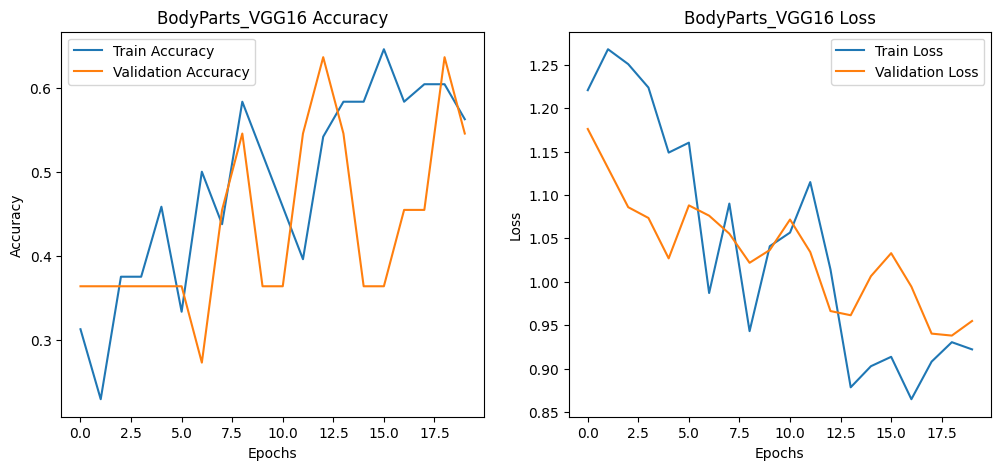

In [23]:
# ✅ Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, 'BodyParts_VGG16')


In [24]:
# Save final models in TensorFlow SavedModel format
model.save('Lips_model')  

INFO:tensorflow:Assets written to: Lips_model/assets


INFO:tensorflow:Assets written to: Lips_model/assets
